# Problem Tanımı ve Amaçlar
* Keras kullanarak görüntü sınıflandırma
## Amaç
* Keras kullanımı ve CNN yapısını anlamak

![alt text](https://cezannec.github.io/assets/cnn_intro/CNN_ex.png)

In [0]:
pip install keras

# Veriyi Çalışmaya Dahil Etmek 

In [0]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
ERROR! Session/line number was not unique in database. History logging moved to new session 59


# Veriyi Tanıma

Label: [9]


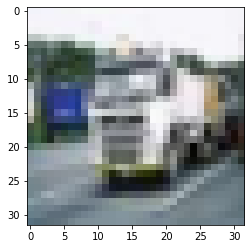

In [0]:
# explore data
datanum=1000
import matplotlib.pyplot as plt
img=plt.imshow(x_train[datanum])
# See label
print("Label:",y_train[datanum])

# One Hot Encoding
Verimizin katogorik sınflarını nümerik sınıflara çevirmek için OHE işlemi  yapılır.

In [0]:
from keras.utils import to_categorical

y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)
# Ohe işleminden sonra y_train
print(y_train_ohe)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [0]:
print("OHE sınıfı:",y_train_ohe[datanum])

OHE sınıfı: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# Görüntü Piksellerini Normalize Etmek

In [0]:
x_train=x_train/255
x_test=x_test/255

# CNN Katmanı Oluşturarak Model Oluşturma

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [0]:
# Model tanımlanır
model=Sequential()
#CNN ve pooling katmanları eklenir
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),activation='relu'))

model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Flatten katmanı eklenir
model.add(Flatten( ))
model.add(Dense(1000,activation='relu') )
model.add(Dense(10,activation='softmax') )# 10 tane etiket olduğu için 10 tane sinir node uluşturuldu.

In [0]:
# Model compile
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Modelin Eğitimi
* Modelin eğitimi sırasında validation_split parametresi ile veri kümesini ayrıma işlemi yapıldı.

In [0]:
learnedmodel=model.fit(x_train,y_train_ohe,batch_size=256,epochs=150,validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.0737 - acc: 0.9742 - val_loss: 2.4435 - val_acc: 0.6511
Epoch 2/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.0483 - acc: 0.9843 - val_loss: 2.4601 - val_acc: 0.6559
Epoch 3/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.0263 - acc: 0.9919 - val_loss: 2.4563 - val_acc: 0.6574
Epoch 4/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.0614 - acc: 0.9793 - val_loss: 2.4754 - val_acc: 0.6557
Epoch 5/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.0663 - acc: 0.9774 - val_loss: 2.5490 - val_acc: 0.6417
Epoch 6/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.1161 - acc: 0.9605 - val_loss: 2.4476 - val_acc: 0.6440
Epoch 7/150
35000/35000 [==============================] - 51s 1ms/step - loss: 0.0686 - acc: 0.9767 - val_loss: 2.4803 - 

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 32)        25632     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 32)          25632     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)             

# Model Başarısı Ölçme ve Görselleştirme

In [0]:
model.evaluate(x_test,y_test_ohe)[1] 

10000/10000 [==============================] - 5s 479us/step


0.6419

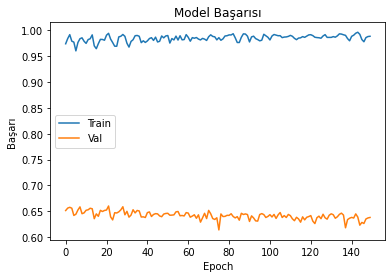

In [0]:
plt.plot(learnedmodel.history['acc'])
plt.plot(learnedmodel.history['val_acc'])
plt.title('Model Başarısı')
plt.ylabel('Başarı')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='center left')
plt.show()

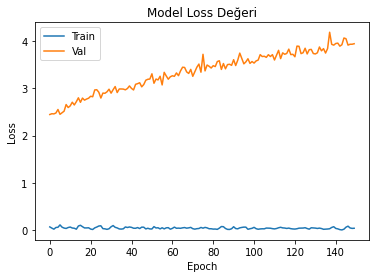

In [0]:
plt.plot(learnedmodel.history['loss'])
plt.plot(learnedmodel.history['val_loss'])
plt.title('Model Loss Değeri')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()

In [0]:
def İmageClassifiar(jpgname='cat.jpg'):
#insert to image
  from google.colab import files
  upload=files.upload()
#show image
  image=plt.imread(jpgname)
  img=plt.imshow(image)
 #resize image 
  # Boyut yenileme gerekiyor
  from skimage.transform import resize
  reimage=resize(image,(32,32,3))
  img=plt.imshow(reimage)
#show probablity
  # Olasılıkları gösterme
  import numpy as np
  ols=model.predict(np.array([reimage,]))
  sınıflar=['Uçak','Otomobil','Kuş','Kedi','Geyik','Köpek','Kurbağa','At','Gemi','Kamyon']
  index=np.argsort(ols[0,:])
  print("\n\n")

  for i in range(9,0,-1):
    print(round(ols[0,index[i]],5)," Olasılık ile sınıfı:",sınıflar[index[i]])


Saving cat.jpg to cat (10).jpg



0.99997  Olasılık ile sınıfı: Köpek
3e-05  Olasılık ile sınıfı: Kedi
0.0  Olasılık ile sınıfı: Geyik
0.0  Olasılık ile sınıfı: At
0.0  Olasılık ile sınıfı: Kuş
0.0  Olasılık ile sınıfı: Uçak
0.0  Olasılık ile sınıfı: Kurbağa
0.0  Olasılık ile sınıfı: Kamyon
0.0  Olasılık ile sınıfı: Gemi


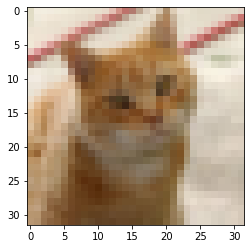

In [0]:
İmageClassifiar()

# Eğitilen Modelin Kayıt Edilmesi

In [0]:
model.save('model_1.h5')

# Önceden Hazırlanan Modelin Yeniden Kullanılması

In [0]:
from keras.models import load_model
model=load_model('model_1.h5')